In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
result = data['Rings']

In [6]:
data = data.drop(['Rings'], axis=1)

In [7]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [13]:
from sklearn import ensemble
import sklearn.cross_validation
import sklearn.metrics

In [22]:
kf = sklearn.cross_validation.KFold(len(data),n_folds=5,shuffle=True,random_state=1)

In [23]:
score = []
for k in xrange(1,51):
    tree= sklearn.ensemble.RandomForestRegressor(n_estimators=k)
    rf = tree.fit(data, result)
    score.append(sklearn.cross_validation.cross_val_score(rf,data,result,cv=kf, n_jobs=-1,scoring='r2').mean())
print score

[0.082702381283526319, 0.32514503033974174, 0.38245317225793107, 0.41847832876664259, 0.43408047691677182, 0.4640136164366746, 0.47980284635893933, 0.47545210767438356, 0.4996037791036857, 0.50318410901054111, 0.49582545140101919, 0.50345234112537196, 0.50718906778632866, 0.50006344663333302, 0.49825761915592964, 0.51436327227399681, 0.51337667050674485, 0.51347744510098925, 0.51530620866475485, 0.5149949355266028, 0.51077543980081974, 0.51675144484889757, 0.51807627285557989, 0.51944207518806629, 0.52428688030375625, 0.52383295366634319, 0.52178640590508096, 0.52263548997953124, 0.52313035688979892, 0.52466619408628856, 0.52292510900012501, 0.52571900255056858, 0.52423485329769592, 0.52929542491621284, 0.52114382635843726, 0.5234374586401106, 0.52725003318252717, 0.53269227798323748, 0.53201075400254028, 0.52400386402795651, 0.52411347688699461, 0.53112956402430633, 0.52410790433211019, 0.52031944037695155, 0.52618155201825778, 0.52362590003854415, 0.53038885813385228, 0.5297976002450

In [30]:
for i,n in enumerate(score):
    if n > 0.52:
        print i
        break

24


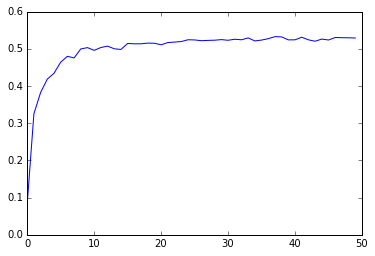

In [31]:
plt.plot(score)